In [14]:
import os

# Fix to be able to import python modules inside a notebook
os.chdir("..")

In [15]:
!ls

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [16]:
import numpy as np
from matplotlib import pyplot as plt

x_train = np.array([1.0, 3.0, 1.5, 1.8, 2.5, 2.8])
y_train = np.array([300, 500, 350, 380, 420, 475])

m = len(x_train)  # m is the number of training examples
print(f"number of training examples: {m}")

print(" ")
print(" ")
print(" ")

number of training examples: 6
 
 
 


(x^(0), y^(0)) = (1.0, 300)
 
 
 
w: 0
b: 0


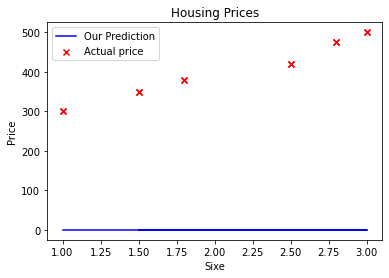

In [17]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")


print(" ")
print(" ")
print(" ")

plt.scatter(x_train, y_train, marker="x", c="r")
plt.title("Housing Prices")  # Set the title
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqrt)")
# plt.show()

w = 0
b = 0
print(f"w: {w}")
print(f"b: {b}")


def calculate_model_output(w, b, x):
    m = x.shape  # the number of training examples
    f_wb = np.zeros(m)
    for i in range(len(x)):
        f_wb[i] = w * x[i] + b
    return f_wb


#  Now Let's call the calculate_model_output func and plot the output
tmp_f_wb = calculate_model_output(w, b, x_train)

plt.plot(x_train, tmp_f_wb, c="b", label="Our Prediction")
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual price")
plt.xlabel("Sixe")
plt.ylabel("Price")
plt.legend()
plt.show()

In [18]:
import pandas as pd

In [29]:
# TRAIN_CSV_PATH = "C:/Users/Lenovo/PycharmProjects/AI_PROJECT/notebooks/train.csv"

TRAIN_CSV_PATH = "C:/Users/Lenovo/PycharmProjects/AI_PROJECT/data/train.csv"
train_df = pd.read_csv(TRAIN_CSV_PATH)

In [30]:
# train_df['crew'].unique()

In [31]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [32]:
features = train_df[["budget", "popularity", 'revenue']]
features.columns

Index(['budget', 'popularity', 'revenue'], dtype='object')

In [33]:
features = features[(features["budget"] > 0) & (features["popularity"] > 0)]

features.dropna(subset=["budget", "popularity"], inplace=True)
# features.dropna(subset=[], inplace=True)

features.sample(10)

,budget,popularity,revenue
698,6000000,11.732546,9077700
930,28000000,10.445141,58795814
430,10000000,6.737797,3400278
1312,30000000,17.955897,90259536
2039,25000000,4.439325,10113733
883,25000000,14.316750,77278331
1763,250000,8.168456,2500000
265,15000000,10.271871,13060843
2790,40000000,7.196688,145896422
2473,500000,8.398158,150277


In [34]:
# standard scaling
features['budget'] = ((features.budget - features.budget.mean()) /  features.budget.std())
features['popularity'] = ((features.popularity - features.popularity.mean()) /  features.popularity.std())
features['revenue'] = ((features.revenue - features.revenue.mean()) /  features.revenue.std())


In [35]:
features.sample(10)

,budget,popularity,revenue
2609,-0.755393,-0.050713,-0.534093
2114,-0.394683,-0.212549,-0.315359
2319,-0.729938,-0.190439,-0.536363
2746,0.226159,0.219923,-0.240131
2274,0.722833,0.388073,0.763956
1348,-0.618187,-0.323347,-0.464645
2780,0.101991,-0.324937,-0.145448
2289,-0.196014,-0.442688,-0.558840
2612,-0.022178,0.344855,0.281819
1248,1.020838,0.021552,0.063823


<AxesSubplot:>

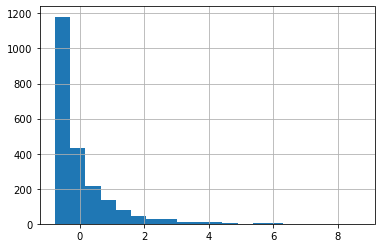

In [36]:
features.budget.hist(bins=20)

<AxesSubplot:>

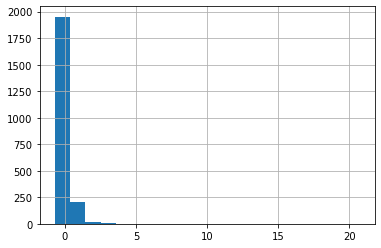

In [37]:
features.popularity.hist(bins=20, )

In [38]:
features[features.popularity > 50]

,budget,popularity,revenue


In [39]:
features.popularity.min(), features.popularity.max()

(-0.7051813679103676, 20.695501358394)

In [40]:
((features.popularity - features.popularity.min()) / (features.popularity.max() - features.popularity.min())).describe()

count    2188.000000
mean        0.032951
std         0.046727
min         0.000000
25%         0.018333
50%         0.028271
75%         0.039599
max         1.000000
Name: popularity, dtype: float64

In [41]:
features.popularity.describe()

count    2.188000e+03
mean    -2.071793e-15
std      1.000000e+00
min     -7.051814e-01
25%     -3.128333e-01
50%     -1.001528e-01
75%      1.422677e-01
max      2.069550e+01
Name: popularity, dtype: float64

In [42]:
# Min / max scaling
((features.budget - features.budget.min()) / (features.budget.max() - features.budget.min())).describe()

count    2188.000000
mean        0.081298
std         0.105968
min         0.000000
25%         0.013553
50%         0.042105
75%         0.105263
max         1.000000
Name: budget, dtype: float64

In [43]:
# standard scaling
((features.budget - features.budget.mean()) /  features.budget.std()).describe()


count    2.188000e+03
mean    -1.209549e-17
std      1.000000e+00
min     -7.671890e-01
25%     -6.392954e-01
50%     -3.698497e-01
75%      2.261592e-01
max      8.669619e+00
Name: budget, dtype: float64

In [44]:
train_df[train_df.popularity > 60][['original_title', 'popularity']]

,original_title,popularity
2,Whiplash,64.299990
518,Wonder Woman,294.337037
684,Beauty and the Beast,287.253654
1126,The Avengers,89.887648
1309,Gone Girl,154.801009
1673,The Dark Knight,123.167259
1695,Baby Driver,228.032744
1715,War for the Planet of the Apes,146.161786
2126,Guardians of the Galaxy Vol. 2,185.330992
2293,The Circle,88.439243


In [45]:
features

# 1. Удалить строки с нулевым бюджетом (проверить, что нет пропусков NaN, Null)  Done
# 2. Нормировать данные (min/max scaling, standard scaling)
# 3. Написать функцию для подсчёта функции потерь
# 4. Написать шаг оптимизации параметров MSE + градиентный спуск.

# Подумать, что делать с не числовыми признаками? Как их интерпретировать?
# binary encoding, OHE one hot encoding e.t.c.

features.describe()

w1 = 0.00000001
w2 = 100

In [46]:
# 

In [47]:
train_x = features.to_numpy()

In [48]:
target = train_df["revenue"]

In [113]:
target

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64

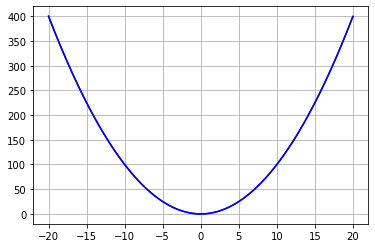

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# MSE loss function
def mse_loss(val_pred, val_true):
    squared_error = (val_pred - val_true) ** 2
#     sum_squared_error = np.sum(squared_error)
#     loss = sum_squared_error / val_true.size
    loss = squared_error.mean()
    return loss


# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)


plt.plot(x_vals, y_vals, "blue")
plt.plot(x_vals, y_vals, "blue")
plt.grid(True, which="major")
plt.show()

In [115]:
x_train = features[['budget', 'popularity']]
y_train = features['revenue'].to_numpy()

X = np.concatenate([x_train.to_numpy(), np.ones([len(x_train), 1])], axis=1)
# features.to_numpy().shape, np.ones([len(features), 1]).shape
X @ w

array([-0.22760154, -0.10445329,  3.95625987, ...,  0.34918771,
        0.43769034,  0.05926112])

In [116]:
X, y_train

(array([[-0.41951715, -0.22723076,  1.        ],
        [ 0.22615922, -0.10555286,  1.        ],
        [-0.68523781,  3.96984103,  1.        ],
        ...,
        [ 0.84700188,  0.34767226,  1.        ],
        [ 0.27582663,  0.43806331,  1.        ],
        [ 0.10199069,  0.05900215,  1.        ]]),
 array([-0.48010035,  0.05262927, -0.47510104, ...,  0.01601837,
         0.54663752, -0.03137727]))

In [117]:
# w = random_normal()             # можно пробовать и другие виды инициализации
# repeat S times:                 # другой вариант: while abs(err) > tolerance
#    f = X.dot(w)                 # посчитать предсказание
#    err = f - y                  # посчитать ошибку
#    grad = 2 * X.T.dot(err) / N  # посчитать градиент
#    w -= alpha * grad            # обновить веса

LR = 0.01
w = np.random.randn(3)
N = len(y_train)
f = 0
x_axis = []
y_axis = []

for i in range(300):
    f = X.dot(w)
    err = f - y_train
    grad = 2 * X.T.dot(err) / N
    w -= LR * grad
    if i % 10 == 0:
        x_axis.append(i)
        y_axis.append(err.mean())
        #  print(err.mean())
    

In [118]:
w

array([0.66325515, 0.23914801, 0.00400422])

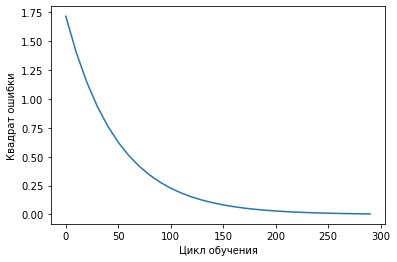

In [119]:
fig, ax = plt.subplots()

ax.plot(x_axis, y_axis)
plt.xlabel("Цикл обучения")
plt.ylabel("Квадрат ошибки")
plt.show()

In [134]:
#     loss.backward()
#     optimizer.step()



In [135]:
TEST_CSV_PATH = "C:/Users/Lenovo/PycharmProjects/AI_PROJECT/data/test.csv"
train_dft = pd.read_csv(TEST_CSV_PATH)

In [136]:
featurest = train_dft[["budget", "popularity"]]
featurest.columns

Index(['budget', 'popularity'], dtype='object')

In [137]:
featurest = featurest[(featurest["budget"] > 0) & (featurest["popularity"] > 0)]

featurest.dropna(subset=["budget", "popularity"], inplace=True)
# features.dropna(subset=[], inplace=True)

featurest.sample(10)

,budget,popularity
2597,20000000,0.304988
3995,35000000,11.787942
1247,3000000,6.212433
3503,2079000,4.558793
2835,40000000,9.524283
2395,15000000,41.048867
3272,35866397,3.689930
213,3950000,5.276546
539,20000000,5.946085
3042,64000000,11.376954


In [138]:
# standard scaling
featurest['budget'] = ((features.budget - features.budget.mean()) /  features.budget.std())
featurest['popularity'] = ((features.popularity - features.popularity.mean()) /  featurest.popularity.std())

<AxesSubplot:>

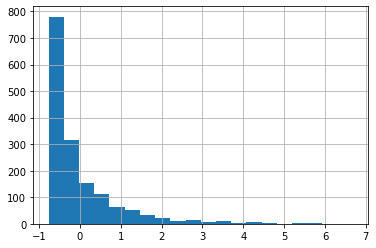

In [141]:
featurest.budget.hist(bins=20)

<AxesSubplot:>

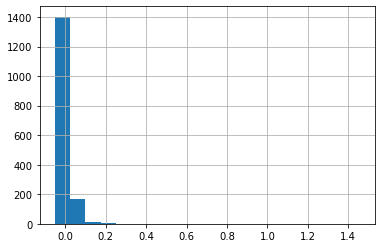

In [143]:
featurest.popularity.hist(bins=20)

In [ ]:
for i in budget:
    
    